# Modulation Classification Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Input, Conv1D, ReLU, BatchNormalization, Add, AveragePooling1D, Flatten, Dense, MaxPooling1D
# from keras.layers.core import Activation, Flatten, Dense, Dropout
#import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, MaxPool2D, GlobalAveragePooling2D, AveragePooling2D, Add, Input, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import glob
import os
import pickle

## Import Data

In [3]:
data = np.load('PCS_MDRC_1024.npy')
print(data.shape)
target = np.load('PCS_MDRC_TARGET.npy')
print(target.shape)

(110000, 2, 1024, 1)
(110000,)


In [4]:
types = ['BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 
         'PAM4','GFSK', 'CPFSK', 'B-FM', 'DSB-AM', 'SSB-AM']

label_dict = {0: '16QAM', 
              1: '64QAM', 
              2: '8PSK', 
              3: 'B-FM', 
              4: 'BPSK', 
              5: 'CPFSK', 
              6: 'DSB-AM',
              7: 'GFSK',
              8: 'PAM4',
              9: 'QPSK',
              10: 'SSB-AM'}

labels = 11

## Model Development

In [5]:
def cnn1d(input_dim, labels):
    '''
    1d model (not used)
    '''
    kern_size = 2
    
#     x_input = Input(shape=input_dim)
    x_input = Input(shape=(1024, 2))
        
    x = Conv1D(32, kern_size, padding='same')(x_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(32, kern_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(32, kern_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(64, kern_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(64, kern_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(64, kern_size, padding='same')(x)
    x = AveragePooling1D()(x)
    x = Flatten()(x)

    output = Dense(labels, activation='softmax')(x)
    
    model = tf.keras.models.Model(x_input, output)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

In [6]:
def cnn2d(input_dim, labels):
    '''
    2d model
    '''

    kern_size = (3, 3)
    
#     x_input = Input(shape=input_dim)
    x_input = Input(shape=(2,1024,1))
    
    x = Conv2D(32, kern_size, padding='same')(x_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=2, padding='same')(x)
    
    x = Conv2D(32, kern_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=2, padding='same')(x)
    
    x = Conv2D(32, kern_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=2, padding='same')(x)
    
    x = Conv2D(64, kern_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=2, padding='same')(x)
    
    x = Conv2D(64, kern_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=2, padding='same')(x)
    
    x = Conv2D(64, kern_size, padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)

    output = Dense(labels, activation='softmax')(x)
    
    model = tf.keras.models.Model(x_input, output)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

In [7]:
# Split data into training and evaluation
X = data
Y = target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

y_train = to_categorical(y_train, 11)
y_test = to_categorical(y_test,11)

In [8]:
model = cnn2d(x_train.shape, labels)
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]

(None, 2, 1024, 1) <dtype: 'float32'>
(None, 11) <dtype: 'float32'>


[None]

In [9]:
def train_mod(model, x_train, y_train, x_test=None, y_test=None, epochs=10):
    
    if all(v is None for v in [x_test, y_test]):
        data = model.fit(x_train, y_train, epochs=epochs)
        
    else:
        data = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

        loss = data.history.get('loss')
        acc = data.history.get('accuracy')
        val_loss = data.history.get('val_loss')
        val_acc = data.history.get('val_accuracy')
    
    
    return zip(loss, acc, val_loss, val_acc)

In [10]:
data = train_mod(model, x_train, y_train, x_test, y_test, 20)
loss, acc, val_loss, val_acc = zip(*data)
# data = train_mod(model, x_train, y_train)

Epoch 1/20
2579/2579 [==============================] - 75s 29ms/step - loss: 0.4812 - accuracy: 0.7679 - val_loss: 0.4912 - val_accuracy: 0.7656
Epoch 2/20
2579/2579 [==============================] - 74s 29ms/step - loss: 0.3102 - accuracy: 0.8549 - val_loss: 0.2829 - val_accuracy: 0.8836
Epoch 3/20
2579/2579 [==============================] - 74s 29ms/step - loss: 0.2438 - accuracy: 0.8929 - val_loss: 0.3155 - val_accuracy: 0.8572
Epoch 4/20
2579/2579 [==============================] - 74s 29ms/step - loss: 0.2126 - accuracy: 0.9080 - val_loss: 0.2690 - val_accuracy: 0.8783
Epoch 5/20
2579/2579 [==============================] - 74s 29ms/step - loss: 0.1885 - accuracy: 0.9195 - val_loss: 0.2072 - val_accuracy: 0.9033
Epoch 6/20
2579/2579 [==============================] - 75s 29ms/step - loss: 0.1758 - accuracy: 0.9238 - val_loss: 0.3941 - val_accuracy: 0.8421
Epoch 7/20
2579/2579 [==============================] - 75s 29ms/step - loss: 0.1603 - accuracy: 0.9312 - val_loss: 0.2215 -

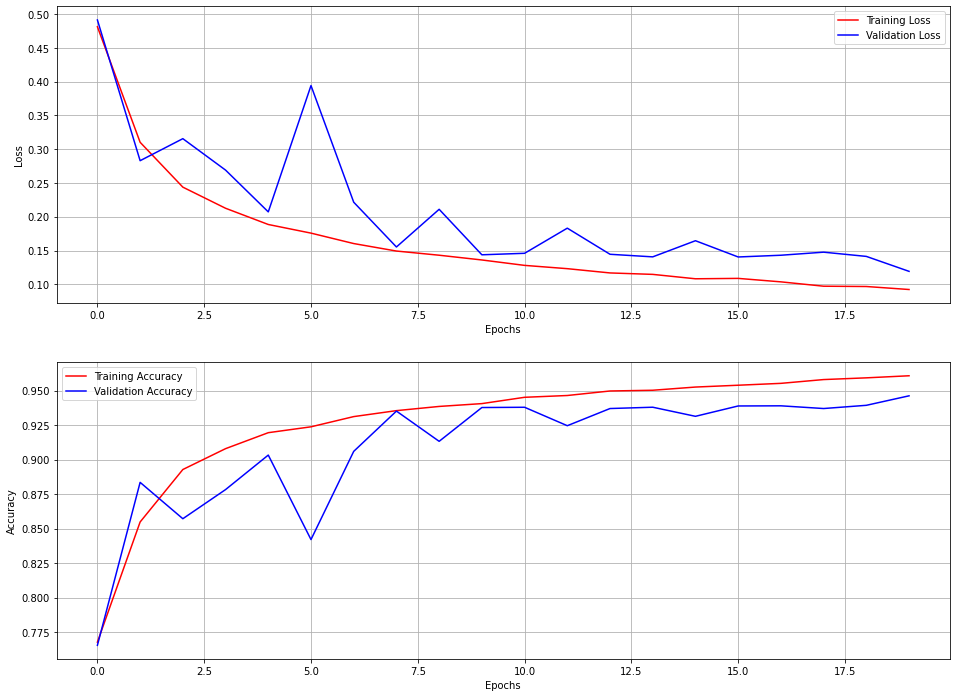

In [11]:
fig, axs = plt.subplots(2,1, figsize=(16,12))
plt.sca(axs[0])
plt.plot(range(len(loss)), loss, color='r', label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, color='b',label='Validation Loss')
plt.legend()
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
plt.grid()

plt.sca(axs[1])
plt.plot(range(len(acc)), acc, color='r', label = 'Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, color='b', label='Validation Accuracy')
plt.legend()
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
plt.grid()

plt.show()

Model overfitting-- adjusting layers or data may improve results

In [12]:
tf.keras.backend.clear_session()